In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import ssl
from pandas import Series
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

ssl._create_default_https_context = ssl._create_unverified_context
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

#coding:utf-8
import json
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

import time, json, requests
# 抓取腾讯疫情实时json数据
url = '/Users/apple/Downloads/complaints.csv'
data = pd.read_csv(url)

# replace space with _
data.columns = data.columns.map(lambda x: x.replace(' ', '_'))

# print(data[data.duplicated()]==True)

data.index=pd.to_datetime(data.index)


In [11]:
data=data.drop(['Company_public_response','Tags','Consumer_consent_provided?'],axis=1)

In [13]:
print(data[data.duplicated()]==True)

Empty DataFrame
Columns: [Date_received, Product, Sub-product, Issue, Sub-issue, Consumer_complaint_narrative, Company, State, ZIP_code, Submitted_via, Date_sent_to_company, Company_response_to_consumer, Timely_response?, Consumer_disputed?, Complaint_ID]
Index: []


In [15]:
print(data.columns)

Index(['Date_received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company', 'State', 'ZIP_code',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response?', 'Consumer_disputed?', 'Complaint_ID'],
      dtype='object')


In [12]:
print(data.Complaint_ID.count())
print(data.State.count())
print(data['State'].value_counts())

1580779
1553961
CA                                      213839
FL                                      166250
TX                                      134974
NY                                      107848
GA                                       84841
IL                                       60199
NJ                                       57047
PA                                       54581
NC                                       48480
OH                                       46112
VA                                       43880
MD                                       42869
MI                                       35934
AZ                                       32304
WA                                       28315
MA                                       27302
TN                                       26353
SC                                       24382
CO                                       24140
MO                                       22288
NV                                       211

In [28]:
statewise=data.groupby('State').Complaint_ID.count()/1580779

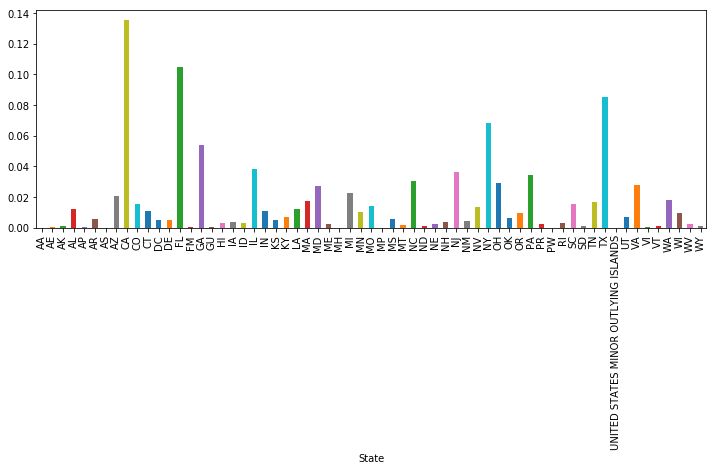

In [38]:
fig = plt.figure(figsize=(12,4))   
statewise.plot(kind = 'bar', legend = False)

#xlab(label="Products") + ylab(label="Percentage of Complaints")

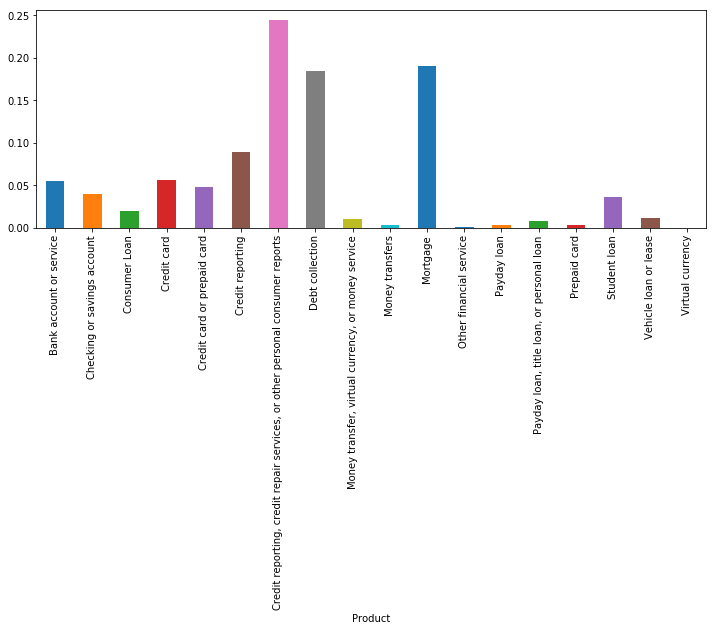

In [40]:
productwise=data.groupby('Product').Complaint_ID.count()/1580779
fig = plt.figure(figsize=(12,4))   
productwise.plot(kind = 'bar', legend = False)


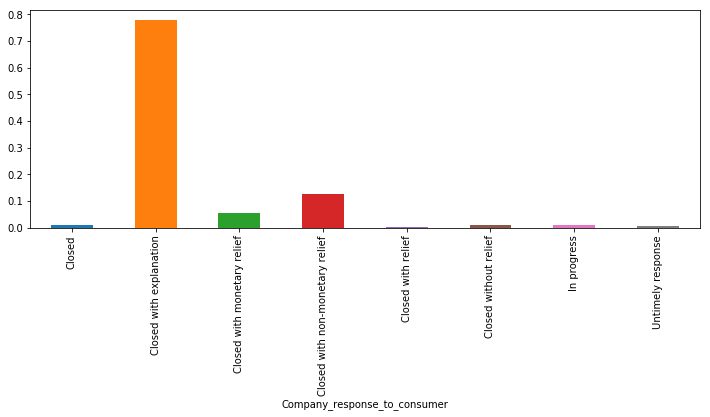

In [41]:
reponsewise=data.groupby('Company_response_to_consumer').Complaint_ID.count()/1580779
fig = plt.figure(figsize=(12,4))   
reponsewise.plot(kind = 'bar', legend = False)

In [42]:
text=data[data['Consumer_complaint_narrative'].notnull()]


In [43]:
from io import StringIO
s=StringIO()
text['Consumer_complaint_narrative'].apply(lambda x: s.write(x))

k=s.getvalue()
s.close()
k=k.lower()
k=k.split()

In [ ]:
'''
At this point we have k,s and c
k Array of words, with stop words removed

s Concatinated string of all comments

c Collection of words 
'''

In [58]:
import collections as co
from nltk.book import *

words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
k=[i for i in k if i in words and i not in stopWords]
s=" ".join(k)
c = co.Counter(k)

In [59]:
c.most_common(14)

[('credit', 791710),
 ('account', 545711),
 ('would', 339957),
 ('information', 291730),
 ('payment', 283196),
 ('loan', 266723),
 ('told', 257993),
 ('report', 248543),
 ('received', 234872),
 ('bank', 231871),
 ('debt', 218886),
 ('never', 205483),
 ('company', 200578),
 ('sent', 186542)]

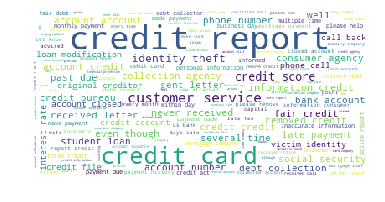

In [60]:
from wordcloud import WordCloud

# Read the whole text.
text = s

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(k),max_font_size=40, relative_scaling=.8).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()